In [12]:
#Load and explore dataset
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\employee-attrition-prediction-dataset\employee_attrition_dataset_10000.csv")

# Display basic information about the dataset
df.head()


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [13]:
#Process the dataset
# Check for missing values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime', 'Attrition']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=['Attrition', 'Employee_ID'])
y = df['Attrition']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,1,2,0,3,5,7332,81,24,...,0,9,48,16,4,1,1,49,3,0
1,2,48,0,0,1,1,4,6069,55,18,...,1,9,57,10,4,1,1,25,1,0
2,3,34,0,1,3,3,4,11485,65,6,...,1,3,55,1,1,4,3,21,1,1
3,4,27,0,0,1,3,4,18707,28,12,...,0,9,53,2,3,4,1,46,2,0
4,5,40,1,1,1,0,1,16398,92,3,...,0,1,54,11,1,1,1,43,4,0


In [15]:
#train a machine learning model
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importance for visualization
sorted_indices = importances.argsort()


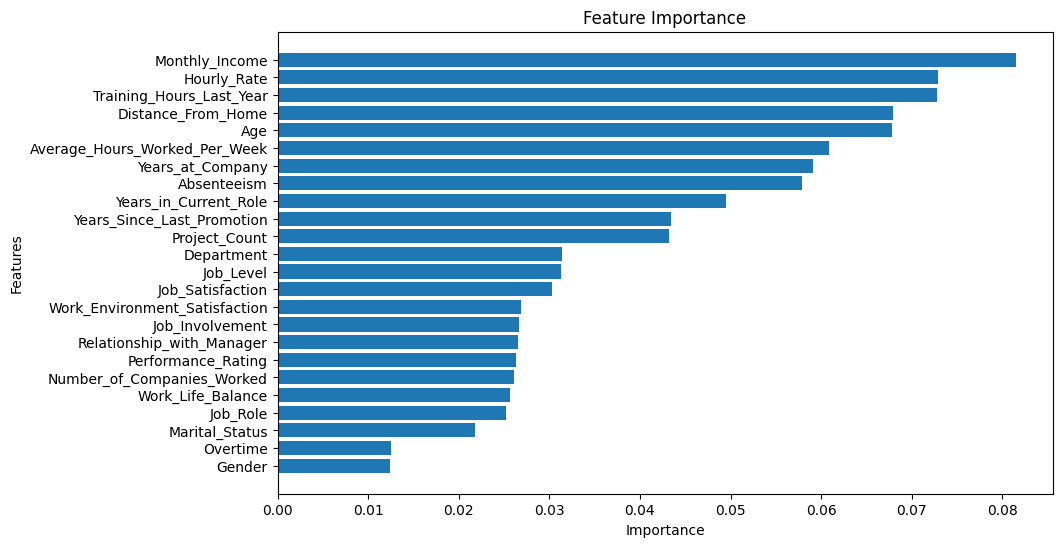

In [16]:
#visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


Accuracy: 0.80


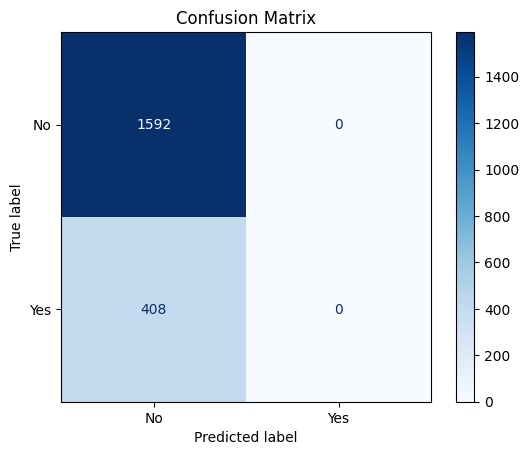

In [17]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Attrition'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Predict attrition for new employees
# Define a new employee with all features
new_employee_data = {
    'Age': [30],
    'Gender': [label_encoders['Gender'].transform(['Male'])[0]],
    'Marital_Status': [label_encoders['Marital_Status'].transform(['Single'])[0]],
    'Department': [label_encoders['Department'].transform(['IT'])[0]],
    'Job_Role': [0],  
    'Job_Level': [1],  
    'Monthly_Income': [5000],  
    'Hourly_Rate': [50],  
    'Years_at_Company': [2],  
    'Years_in_Current_Role': [1],  
    'Years_Since_Last_Promotion': [0],  
    'Work_Life_Balance': [3],  
    'Job_Satisfaction': [4],  
    'Performance_Rating': [3],  
    'Training_Hours_Last_Year': [20],  
    'Overtime': [label_encoders['Overtime'].transform(['No'])[0]],
    'Project_Count': [3],  
    'Average_Hours_Worked_Per_Week': [40],  
    'Absenteeism': [5],  
    'Work_Environment_Satisfaction': [3],  
    'Relationship_with_Manager': [4],  
    'Job_Involvement': [3],  
    'Distance_From_Home': [10],  
    'Number_of_Companies_Worked': [1]  
}

# Create a dataframe for the new employee
new_employee_df = pd.DataFrame(new_employee_data)

# Predict attrition
prediction = model.predict(new_employee_df)
predicted_attrition = label_encoders['Attrition'].inverse_transform(prediction)
print(f'Predicted Attrition: {predicted_attrition[0]}')


Predicted Attrition: No
